# Training Model 

### Data Cleaning

In [35]:
import pandas as pd 
import numpy as np 
import os

In [36]:
folder_path = os.path.join("data")
raw_data_file_path = os.path.join(folder_path, "raw_data.csv")
df = pd.read_csv(raw_data_file_path)
df.head()

,class,tweets,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,Thank u!,NaN,NaN,NaN
1,0,Going for dinner.msg you after.,NaN,NaN,NaN
2,0,Hi i won't b ard 4 christmas. But do enjoy n m...,NaN,NaN,NaN
3,0,1. Tension face 2. Smiling face 3. Waste face ...,NaN,NaN,NaN
4,0,1 I don't have her number and 2 its gonna be a...,NaN,NaN,NaN


In [37]:
df = df.iloc[:, :2] 
clened_data_file_path = os.path.join(folder_path, "cleaned_data.csv")
df.to_csv(clened_data_file_path, index=False)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   5572 non-null   int64 
 1   tweets  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [39]:
df.head()

,class,tweets
0,0,Thank u!
1,0,Going for dinner.msg you after.
2,0,Hi i won't b ard 4 christmas. But do enjoy n m...
3,0,1. Tension face 2. Smiling face 3. Waste face ...
4,0,1 I don't have her number and 2 its gonna be a...


### Data Transformation

In [40]:
from CleanText import SentTokenize,Token_to_Sent 
from  RemoveStopWords import stopWords_removal
from PorterStemmer import porter_stemmer 

def pipeline(input_phrase):
    obj = SentTokenize(phrase=input_phrase) 
    obj = obj.get_tokenized_sentence() 
    print(f"Tokenized sentence: {obj}")

    obj = stopWords_removal(tokenized_sentence=obj) 
    obj = obj.get_refined_tokeinzed_sentence()
    print(f"After stop words removal: {obj}")

    obj = porter_stemmer(tokenised_phrase=obj)
    obj = obj.get_stemmed_tokens() 
    
    print(f"After stemming with porters algorithm: {obj}") 
    return obj



In [41]:
df["transformed_tweets"] = df["tweets"].apply(pipeline)

Tokenized sentence: ['thank', 'u']
After stop words removal: ['thank', 'u']
After stemming with porters algorithm: ['thank']
Tokenized sentence: ['going', 'for', 'dinner', 'msg', 'you', 'after']
After stop words removal: ['going', 'dinner', 'msg']
go
After stemming with porters algorithm: ['go', 'dinner', 'msg']
Tokenized sentence: ['hi', 'i', 'won', 't', 'b', 'ard', 'christmas', 'but', 'do', 'enjoy', 'n', 'merry', 'x', 'mas']
After stop words removal: ['hi', 'b', 'ard', 'christmas', 'enjoy', 'n', 'merry', 'x', 'mas']
After stemming with porters algorithm: ['ard', 'christma', 'enjoi', 'merri', 'ma']
Tokenized sentence: ['tension', 'face', 'smiling', 'face', 'waste', 'face', 'innocent', 'face', 'terror', 'face', 'cruel', 'face', 'romantic', 'face', 'lovable', 'face', 'decent', 'face', 'lt', 'gt', 'joker', 'face']
After stop words removal: ['tension', 'face', 'smiling', 'face', 'waste', 'face', 'innocent', 'face', 'terror', 'face', 'cruel', 'face', 'romantic', 'face', 'lovable', 'face', 

In [42]:
df.head()

,class,tweets,transformed_tweets
0,0,Thank u!,[thank]
1,0,Going for dinner.msg you after.,"[go, dinner, msg]"
2,0,Hi i won't b ard 4 christmas. But do enjoy n m...,"[ard, christma, enjoi, merri, ma]"
3,0,1. Tension face 2. Smiling face 3. Waste face ...,"[tension, face, smile, face, wast, face, innoc..."
4,0,1 I don't have her number and 2 its gonna be a...,"[number, gonna, massiv, pain, ass, rather, get..."


### Data Training

Training Set Shape: (5402, 2000) (5402,)
Validation Set Shape: (2316, 2000) (2316,)
Test Set Shape: (1115, 2000) (1115,)


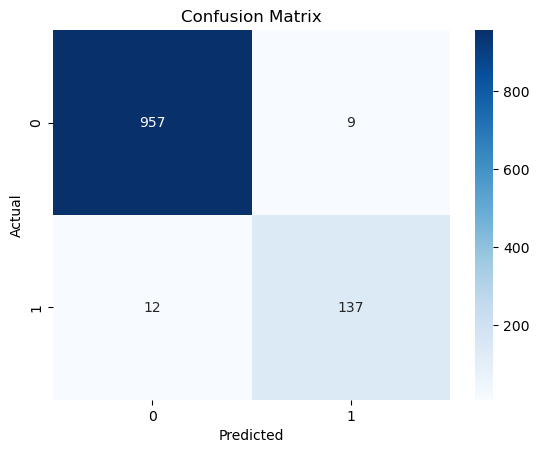

SVM Model, Vectorizer, Training History, Test Results, and Confusion Matrix Saved!


In [47]:
import os
import pandas as pd
import numpy as np
import pickle
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE  # Import SMOTE

# Ensure results directory exists
os.makedirs("model_results", exist_ok=True)

# Prepare data
X = df["transformed_tweets"].apply(lambda words: " ".join(words))  # Convert list to space-separated string
y = df["class"]

# Convert text to TF-IDF features (better for SVM)
vectorizer = TfidfVectorizer(max_features=2000)
X_tfidf = vectorizer.fit_transform(X).toarray()

# Split data into training (80%) and test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_tfidf, np.array(y), test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE to balance classes in training data
smote = SMOTE(random_state=42)
X_train_val_sm, y_train_val_sm = smote.fit_resample(X_train_val, y_train_val)

# Split training data into training (70%) and validation (30%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val_sm, y_train_val_sm, test_size=0.3, random_state=42
)

# Check the shapes of X and y
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Validation Set Shape:", X_val.shape, y_val.shape)
print("Test Set Shape:", X_test.shape, y_test.shape)

# Create and train SVM model
svm_model = SVC(kernel="linear", probability=True)
svm_model.fit(X_train, y_train)

# Predictions and evaluation
y_train_pred = svm_model.predict(X_train)
y_val_pred = svm_model.predict(X_val)
y_test_pred = svm_model.predict(X_test)

# Compute accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Compute log loss (since we used probability=True)
train_loss = log_loss(y_train, svm_model.predict_proba(X_train))
val_loss = log_loss(y_val, svm_model.predict_proba(X_val))
test_loss = log_loss(y_test, svm_model.predict_proba(X_test))

# Store training history
history_df = pd.DataFrame({
    "epoch": range(1, 2),  # Since SVM is not iterative, we store one entry
    "train_loss": [train_loss],
    "train_accuracy": [train_accuracy],
    "val_loss": [val_loss],
    "val_accuracy": [val_accuracy]
})

history_df.to_csv("model_results/training_history.csv", index=False)

# Save test results
test_results_df = pd.DataFrame({"test_loss": [test_loss], "test_accuracy": [test_accuracy]})
test_results_df.to_csv("model_results/test_results.csv", index=False)

# Save the SVM model using pickle
with open("model_results/svm_model.pkl", "wb") as f:
    pickle.dump(svm_model, f)

# Save the vectorizer using pickle
with open("model_results/vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("model_results/confusion_matrix.png")  # Save the confusion matrix as an image
plt.show()

print("SVM Model, Vectorizer, Training History, Test Results, and Confusion Matrix Saved!")

### Model and label encoder saving



In [ ]:
import pickle
import numpy as np

# Load the stored model and vectorizer
with open("model_results/svm_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

with open("model_results/vectorizer.pkl", "rb") as f:
    loaded_vectorizer = pickle.load(f)

def get_predicted_class(sentence):
    """
    Predicts the class of a given sentence using the trained SVM model.

    Args:
        sentence (str): Input sentence to classify.

    Returns:
        int: Predicted class (0 or 1).
    """
    # Transform the input sentence using the stored vectorizer
    transformed_input = loaded_vectorizer.transform([sentence]).toarray()
    # Predict class
    prediction = loaded_model.predict(transformed_input)
    print(f"Predicted Class: {prediction[0]}")
    return prediction[0]

# Example usage:
# get_predicted_class("Your text message here")


In [53]:
sentence = "I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enou.." 
k = get_predicted_class(sentence) 
k

Predicted Class: 0


0

In [54]:
tp = pd.read_csv("data/raw_data.csv")

In [ ]:
tp[tp["class"] == 0].iloc[0]

class                                                         1
tweets        U can WIN �100 of Music Gift Vouchers every we...
Unnamed: 2                                                  NaN
Unnamed: 3                                                  NaN
Unnamed: 4                                                  NaN
Name: 41, dtype: object